In [65]:
#Dependencies
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
from scipy.stats import linregress
import numpy as np
import adjustText
from adjustText import adjust_text
import plotly.express as px
from dash import Dash, dcc, html, Input, Output
import plotly.graph_objects as go


#Upload from CSVs
prof_adv_path = "prof_adv_2023_all.csv"
dist_attend_path = "District Proportional Attendance Rates.csv"
fr_rates_path = "FRLUNCH.csv"
fr_all_path = "FRALL.csv"
dist_count_path = "district_counties.csv"
fr_dist_path = "fr_district"

#Read data and results
prof_adv_df = pd.read_csv(prof_adv_path)
fr_all_df = pd.read_csv(fr_all_path)
dist_count_df = pd.read_csv(dist_count_path)
att_all_df = pd.read_csv(dist_attend_path)
fr_dist_df = pd.read_csv(fr_dist_path)

fr_dist_df.head()



,District Name,FR_PCT,PROFICIENT_PCT,ADVANCED_PCT,TOTAL_PCT
0,AFFTON 101,35.7,21.2,12.5,33.7
1,BAYLESS,52.7,24.1,27.1,51.2
2,BRENTWOOD,18.1,20.2,42.3,62.5
3,CLAYTON,9.1,23.6,46.6,70.2
4,CRYSTAL CITY 47,44.6,23.6,21.1,44.7


## Filter Prof/Advanced

In [18]:
#Filter to only total scores
prof_adv_total_df = prof_adv_df.loc[(prof_adv_df["TYPE"]=="Total")]

#Filter to only math
prof_adv_math_df = prof_adv_total_df.loc[(prof_adv_total_df["CONTENT_AREA"]=="Mathematics")]

#Reduce
prof_adv_math_reduced_df = prof_adv_math_df[["DISTRICT_NAME", "PROFICIENT_PCT", "ADVANCED_PCT"]]

#Export to csv
prof_adv_math_reduced_df.to_csv('prof_adv_math.csv', index=False)

#Import edited csv - Narrowed down
prof_adv_math_updated_path = "prof_adv_math_filtered.csv"
prof_adv_math_new_df = pd.read_csv(prof_adv_math_updated_path)



In [19]:
prof_adv_math_reduced_df = prof_adv_math_reduced_df.rename(columns={"DISTRICT_NAME": "District Name"})
prof_adv_math_reduced_df.head()

,District Name,PROFICIENT_PCT,ADVANCED_PCT
17,ADAIR CO. R-I,16.1,12.5
61,KIRKSVILLE R-III,22.6,21.6
76,ADAIR CO. R-II,31.3,*
99,NORTH ANDREW CO. R-VI,32.5,29.9
119,AVENUE CITY R-IX,36.9,29.2


In [20]:
#Rename column
att_all_df = att_all_df.rename(columns={"DISTRICT_NAME": "District Name"})

#Filter by school and scores

att_district_list = ["FRANKLIN CO. R-II", "MERAMEC VALLEY R-III", "NEW HAVEN", "ST. CLAIR R-XIII", "SULLIVAN",
    "UNION R-XI", "WASHINGTON", "CRYSTAL CITY 47", "DESOTO 73", "DUNKLIN R-V", "FESTUS R-VI", "FOX C-6",
    "GRANDVIEW R-II", "HILLSBORO R-III", "JEFFERSON CO. R-VII", "NORTHWEST R-I", "SUNRISE R-IX", "WINDSOR C-1",
    "FERGUSON-FLORISSANT R-II", "HANCOCK PLACE", "HAZELWOOD", "JENNINGS", "NORMANDY SCHOOLS COLLABORATIVE",
    "PATTONVILLE R-III", "RITENOUR", "RIVERVIEW GARDENS", "AFFTON 101", "BAYLESS", "MEHLVILLE R-IX", 
    "FRANCIS HOWELL R-III", "FT. ZUMWALT R-II", "ORCHARD FARM R-V", "ST. CHARLES R-VI", "WENTZVILLE R-IV",
    "ST. LOUIS CITY", "BRENTWOOD", "CLAYTON", "KIRKWOOD R-VII", "LADUE", "LINDBERGH SCHOOLS", 
    "MAPLEWOOD-RICHMOND HEIGHTS", "PARKWAY C-2", "ROCKWOOD R-VI", "UNIVERSITY CITY", "VALLEY PARK", "WEBSTER GROVES"]

att_reduced_1_df = att_all_df.loc[att_all_df["District Name"].isin(att_district_list)]



att_reduced_1_df.head()



            


,YEAR,COUNTY_DISTRICT_CODE,District Name,PROPORTIONAL_ATTENDANCE_TOTAL_90ABV,PROPORTIONAL_ATTENDANCE_TOTAL,PROPORTIONAL_ATTENDANCE_TOTAL_PCT,PROPORTIONAL_ATTENDANCE_ASIAN_90ABV,PROPORTIONAL_ATTENDANCE_ASIAN,PROPORTIONAL_ATTENDANCE_ASIAN_PCT,PROPORTIONAL_ATTENDANCE_BLACK_90ABV,...,PROPORTIONAL_ATTENDANCE_WHITE_PCT,PROPORTIONAL_ATTENDANCE_K_8_90ABV,PROPORTIONAL_ATTENDANCE_K_8,PROPORTIONAL_ATTENDANCE_K_8_PCT,PROPORTIONAL_ATTENDANCE_9_12_90ABV,PROPORTIONAL_ATTENDANCE_9_12,PROPORTIONAL_ATTENDANCE_9_12_PCT,PROPORTIONAL_ATTENDANCE_LEP_PCT,PROPORTIONAL_ATTENDANCE_IEP_PCT,PROPORTIONAL_ATTENDANCE_FRL_PCT
2306,2009,36123,FRANKLIN CO. R-II,150.3437,154.3409,97.4,*,*,*,*,...,97.4,150.3437,154.3409,97.4,*,*,*,*,92.7,94.8
2307,2010,36123,FRANKLIN CO. R-II,155.6702,162.6239,95.7,*,*,*,*,...,95.7,155.6702,162.6239,95.7,*,*,*,*,89.4,92.7
2308,2011,36123,FRANKLIN CO. R-II,144.9314,154.4012,93.9,*,*,*,*,...,93.8,144.9314,154.4012,93.9,*,*,*,*,85.2,90.1
2309,2012,36123,FRANKLIN CO. R-II,134.5333,141.9881,94.7,*,*,*,*,...,94.7,134.5333,141.9881,94.7,*,*,*,*,88.5,91.9
2310,2013,36123,FRANKLIN CO. R-II,133.4635,138.6812,96.2,*,*,*,*,...,96.1,133.4635,138.6812,96.2,*,*,*,*,95.1,93.4


In [21]:
#Merge Attendance



#Filter
att_reduced_1_df = att_reduced_1_df.loc[att_reduced_1_df["YEAR"]==2023]

#Make Smaller
att_all_2_df = att_reduced_1_df[["District Name","PROPORTIONAL_ATTENDANCE_TOTAL_PCT" ]]

#Merge
att_merge_df = pd.merge(att_all_2_df, prof_adv_math_reduced_df, how="inner", on=["District Name"])

att_merge_df.head()

,District Name,PROPORTIONAL_ATTENDANCE_TOTAL_PCT,PROFICIENT_PCT,ADVANCED_PCT
0,FRANKLIN CO. R-II,88.9,33.8,37.7
1,MERAMEC VALLEY R-III,75.7,26.6,17.1
2,UNION R-XI,79.4,26.8,22.7
3,ST. CLAIR R-XIII,78,21,11.6
4,SULLIVAN,79.1,24.2,19


In [22]:
#Add csv with districts and merge
dist_count_df = dist_count_df.rename(columns={"DISTRICT_NAME": "District Name"})

att_merge_df = pd.merge(att_merge_df, dist_count_df, how="inner", on=["District Name"])

#Change data types
#att_merge_df = att_merge_df.rename(columns={0:"FR_PCT"})
att_merge_df = att_merge_df.astype({"PROFICIENT_PCT": "float64"})
att_merge_df = att_merge_df.astype({"ADVANCED_PCT":"float64"})
att_merge_df = att_merge_df.astype({"PROPORTIONAL_ATTENDANCE_TOTAL_PCT": "float64"})
#att_merge_1_df = att_merge_1_df.astype({"TOTAL_PCT":"float64"})
#att_merge_df["PROPORTIONAL_ATTENDANCE_TOTAL_PCT"]=att_merge_df["PROPORTIONAL_ATTENDANCE_TOTAL_PCT"].round(0)

#Add Totals Prof/Adv
total_pct = []
for index, row in att_merge_df.iterrows():
     total_pct.append((row["PROFICIENT_PCT"]+row["ADVANCED_PCT"]))
    
att_merge_df["TOTAL_PCT"] = total_pct



att_merge_df

,District Name,PROPORTIONAL_ATTENDANCE_TOTAL_PCT,PROFICIENT_PCT,ADVANCED_PCT,COUNTY,TOTAL_PCT
0,FRANKLIN CO. R-II,88.9,33.8,37.7,Franklin County,71.5
1,MERAMEC VALLEY R-III,75.7,26.6,17.1,Franklin County,43.7
2,UNION R-XI,79.4,26.8,22.7,Franklin County,49.5
3,ST. CLAIR R-XIII,78.0,21.0,11.6,Franklin County,32.6
4,SULLIVAN,79.1,24.2,19.0,Franklin County,43.2
5,NEW HAVEN,93.7,29.8,20.0,Franklin County,49.8
6,WASHINGTON,81.6,28.0,19.5,Franklin County,47.5
7,NORTHWEST R-I,75.4,23.8,17.6,Jefferson County,41.4
8,GRANDVIEW R-II,95.0,12.6,5.6,Jefferson County,18.2
9,HILLSBORO R-III,78.9,25.8,16.6,Jefferson County,42.4


In [23]:
#reduce
att_merge_2_df = att_merge_df[["PROPORTIONAL_ATTENDANCE_TOTAL_PCT", "TOTAL_PCT", "COUNTY"]]
att_merge_2_df.head()

,PROPORTIONAL_ATTENDANCE_TOTAL_PCT,TOTAL_PCT,COUNTY
0,88.9,71.5,Franklin County
1,75.7,43.7,Franklin County
2,79.4,49.5,Franklin County
3,78.0,32.6,Franklin County
4,79.1,43.2,Franklin County


In [24]:
#Round
att_merge_2_df["PROPORTIONAL_ATTENDANCE_TOTAL_PCT"] = att_merge_2_df["PROPORTIONAL_ATTENDANCE_TOTAL_PCT"].round(0)
att_merge_2_df["TOTAL_PCT"]=att_merge_2_df["TOTAL_PCT"].round(0)

att_merge_2_df.head()

/var/folders/x5/vxxw6g_96f337pf8r_zr_15h0000gn/T/ipykernel_1690/3677068292.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  att_merge_2_df["PROPORTIONAL_ATTENDANCE_TOTAL_PCT"] = att_merge_2_df["PROPORTIONAL_ATTENDANCE_TOTAL_PCT"].round(0)
/var/folders/x5/vxxw6g_96f337pf8r_zr_15h0000gn/T/ipykernel_1690/3677068292.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  att_merge_2_df["TOTAL_PCT"]=att_merge_2_df["TOTAL_PCT"].round(0)


,PROPORTIONAL_ATTENDANCE_TOTAL_PCT,TOTAL_PCT,COUNTY
0,89.0,72.0,Franklin County
1,76.0,44.0,Franklin County
2,79.0,50.0,Franklin County
3,78.0,33.0,Franklin County
4,79.0,43.0,Franklin County


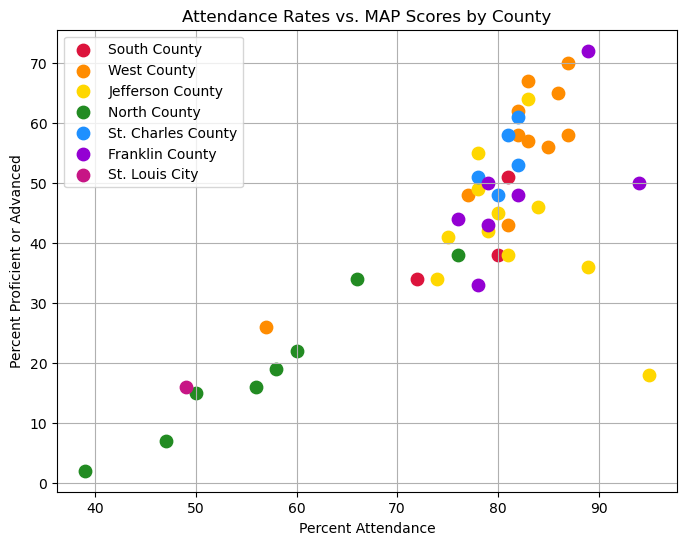

In [25]:
#colors for counties
county_colors = {'South County': "crimson", 'West County': "darkorange", 'Jefferson County': "gold", 'North County': "forestgreen",
       'St. Charles County': "dodgerblue", 'Franklin County': "darkviolet", 'St. Louis City': "mediumvioletred"}

plt.figure(figsize=(8, 6))

for county, color in county_colors.items():
    subset=att_merge_2_df[att_merge_df["COUNTY"]==county]
    plt.scatter(subset["PROPORTIONAL_ATTENDANCE_TOTAL_PCT"], subset["TOTAL_PCT"], c=color, label = county, s=80)
plt.xlabel("Percent Attendance")
plt.ylabel("Percent Proficient or Advanced")
plt.title("Attendance Rates vs. MAP Scores by County")


# Add generation labels to the side
#for county, color in county_colors.items():
   # plt.text(0.95, merged_df[merged_df['COUNTY'] == county]['TOTAL_PCT'].mean(), county, color=color, fontsize=10, ha='right', va='center')
    
plt.legend()
plt.grid()

# Save the plot as an image file
plt.savefig('CountiesVsATT.png')

plt.show()

In [28]:
att_merge_df.columns

Index(['District Name', 'PROPORTIONAL_ATTENDANCE_TOTAL_PCT', 'PROFICIENT_PCT',
       'ADVANCED_PCT', 'COUNTY', 'TOTAL_PCT'],
      dtype='object')

In [55]:
fr_att_merge_df = pd.merge(att_merge_df, fr_dist_df, how="inner", on=["District Name", "TOTAL_PCT"])
fr_att_merge_filter_df = fr_att_merge_df[["District Name", "PROPORTIONAL_ATTENDANCE_TOTAL_PCT", "COUNTY", "TOTAL_PCT", "FR_PCT"]]
fr_att_merge_filter_df.head()

,District Name,PROPORTIONAL_ATTENDANCE_TOTAL_PCT,COUNTY,TOTAL_PCT,FR_PCT
0,FRANKLIN CO. R-II,88.9,Franklin County,71.5,24.8
1,MERAMEC VALLEY R-III,75.7,Franklin County,43.7,41.4
2,UNION R-XI,79.4,Franklin County,49.5,42.3
3,ST. CLAIR R-XIII,78.0,Franklin County,32.6,48.1
4,SULLIVAN,79.1,Franklin County,43.2,46.8


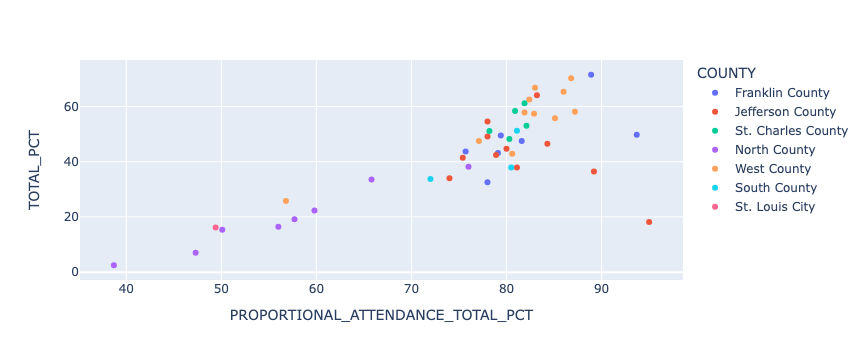

In [37]:
#Plotly
fig = px.scatter(att_merge_df, x="PROPORTIONAL_ATTENDANCE_TOTAL_PCT", y = 'TOTAL_PCT',
                color = 'COUNTY', hover_data=["District Name"])

fig.show()

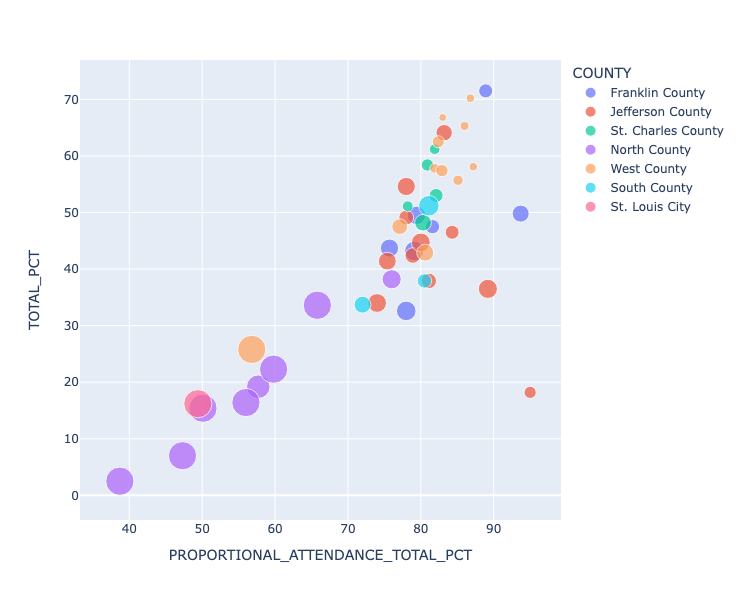

In [136]:
#Plotly
fig = px.scatter(fr_att_merge_filter_df, x="PROPORTIONAL_ATTENDANCE_TOTAL_PCT", y = 'TOTAL_PCT',
                color = 'COUNTY', size= "FR_PCT", hover_data=["District Name"], width=900, height=600)

fig.write_html("SavageSTLCounties.html")
fig.show()

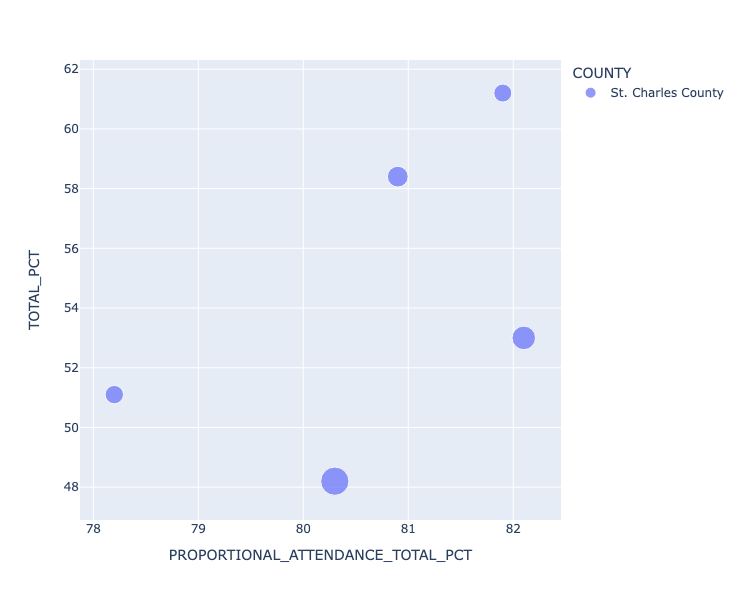

In [135]:
sccounty_df = fr_att_merge_filter_df.loc[fr_att_merge_filter_df["COUNTY"]=="St. Charles County"]

#Plotly
fig = px.scatter(sccounty_df, x="PROPORTIONAL_ATTENDANCE_TOTAL_PCT", y = 'TOTAL_PCT',
                color = 'COUNTY', size= "FR_PCT", hover_data=["District Name"], width=900, height=600)

fig.write_html("Savagescc.html")
fig.show()

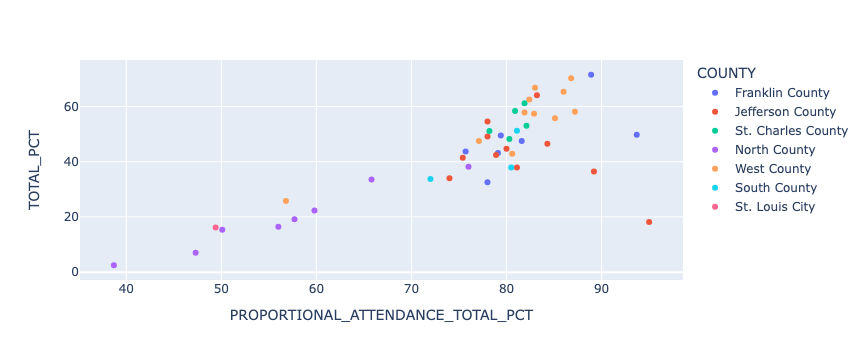

In [38]:
#Plotly
fig = px.scatter(att_merge_df, x="PROPORTIONAL_ATTENDANCE_TOTAL_PCT", y = 'TOTAL_PCT',
                color = 'COUNTY')

fig.show()

In [58]:
app = Dash(__name__)


app.layout = html.Div([
    html.H4('Interactive scatter plot with Iris dataset'),
    dcc.Graph(id="scatter-plot"),
    html.P("Filter by petal width:"),
    dcc.RangeSlider(
        id='range-slider',
        min=0, max=2.5, step=0.1,
        marks={0: '0', 100: '100'},
        value=[0.5, 2]
    ),
])


@app.callback(
    Output("scatter-plot", "figure"), 
    Input("range-slider", "value"))
def update_bar_chart(slider_range):
    df = fr_att_merge_filter_df() # replace with your own data source
    low, high = slider_range
    mask = (df["FR_PCT"] > low) & (df['FR_PCT'] < high)
    fig = px.scatter(
        df[mask], x="PROPORTIONAL_ATTENDANCE_TOTAL_PCT", y="TOTAL_PCT", 
        color="COUNTY", size='FR_PCT', 
        hover_data=['District Name'])
    return fig


app.run_server(debug=True)
#DOWNLOAD



---------------------------------------------------------------------------
TypeError                                 Traceback (most recent call last)
Cell In[58], line 21, in update_bar_chart(slider_range=[0.5, 2])
     17 @app.callback(
     18     Output("scatter-plot", "figure"), 
     19     Input("range-slider", "value"))
     20 def update_bar_chart(slider_range):
---> 21     df = fr_att_merge_filter_df() # replace with your own data source
        fr_att_merge_filter_df =                      District Name  PROPORTIONAL_ATTENDANCE_TOTAL_PCT  \
0                FRANKLIN CO. R-II                               88.9   
1             MERAMEC VALLEY R-III                               75.7   
2                       UNION R-XI                               79.4   
3                 ST. CLAIR R-XIII                               78.0   
4                         SULLIVAN                               79.1   
5                        NEW HAVEN                               93.7   
6  

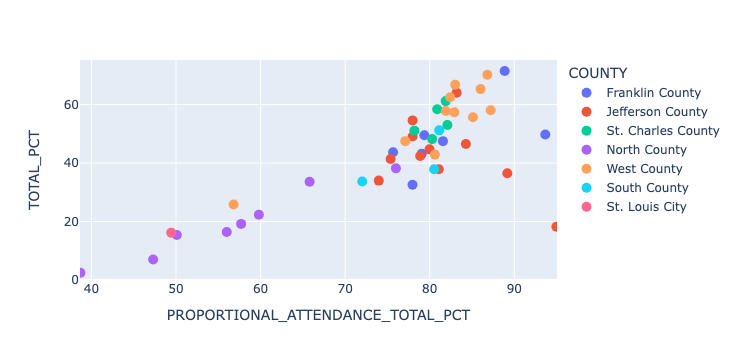

In [64]:
fig = px.scatter(fr_att_merge_filter_df, y="TOTAL_PCT", x="PROPORTIONAL_ATTENDANCE_TOTAL_PCT", 
                 color = "COUNTY", hover_data="District Name")

fig.update_traces(marker_size=10)
fig.update_layout(scattermode="group")
fig.show()

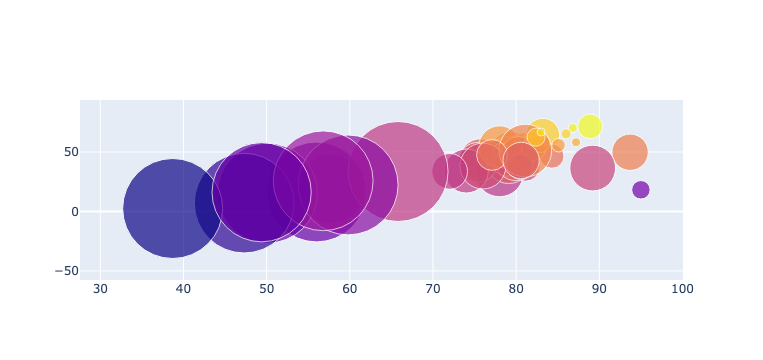

In [115]:
fig = go.Figure(data=go.Scatter(x=fr_att_merge_filter_df["PROPORTIONAL_ATTENDANCE_TOTAL_PCT"],
                                y=fr_att_merge_filter_df["TOTAL_PCT"], 
                                mode="markers", 
                                marker_size = fr_att_merge_filter_df["FR_PCT"], 
                                marker_color = fr_att_merge_filter_df["TOTAL_PCT"]
                               #color=fr_att_merge_filter_df["COUNTY"]
                               ))

fig.show()

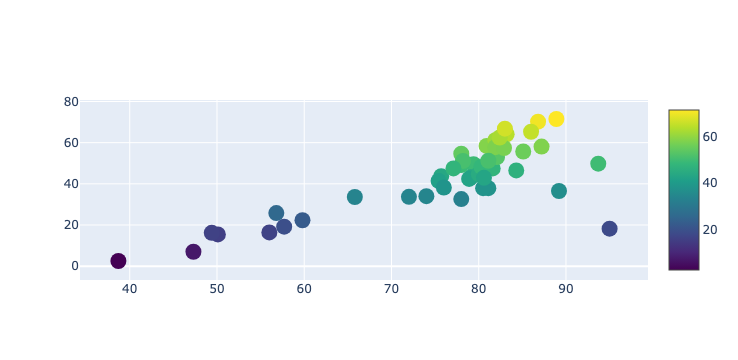

In [89]:
fig = go.Figure(data=go.Scatter(x=fr_att_merge_filter_df["PROPORTIONAL_ATTENDANCE_TOTAL_PCT"],
                                y=fr_att_merge_filter_df["TOTAL_PCT"], 
                                mode="markers", marker = dict(size=16, color=fr_att_merge_filter_df["TOTAL_PCT"],
                                                              colorscale="Viridis",
                                                              showscale=True)
                               ))
fig.show()

In [112]:
fr_att_merge_filter_df["TOTAL_PCT"].to_csv("fr_totpct_district", index=False)

In [110]:
z_data = pd.read_csv("fr_totpct_district")
z = z_data.values

fig = go.Figure(data=[go.Surface(z=z_data.values)])
fig.update_layout(title='Mt Bruno Elevation', autosize=False,
                  width=500, height=500,
                  margin=dict(l=65, r=50, b=65, t=90))

z

array([[71.5],
       [43.7],
       [49.5],
       [32.6],
       [43.2],
       [49.8],
       [47.5],
       [41.4],
       [18.2],
       [42.4],
       [34. ],
       [64.1],
       [46.5],
       [36.5],
       [37.9],
       [49.1],
       [44.7],
       [54.6],
       [58.4],
       [61.2],
       [51.1],
       [48.2],
       [53. ],
       [19.2],
       [16.4],
       [38.2],
       [57.8],
       [58.1],
       [55.7],
       [37.9],
       [57.4],
       [33.7],
       [51.2],
       [62.5],
       [70.2],
       [33.6],
       [15.4],
       [66.8],
       [47.5],
       [ 7. ],
       [22.3],
       [ 2.5],
       [25.8],
       [42.9],
       [65.3],
       [16.2]])

In [111]:
z_data = pd.read_csv('https://raw.githubusercontent.com/plotly/datasets/master/api_docs/mt_bruno_elevation.csv')
z = z_data.values
z

array([[ 0.000000e+00,  2.780985e+01,  4.961936e+01,  8.308067e+01,
         1.166632e+02,  1.304140e+02,  1.507206e+02,  2.201871e+02,
         1.561536e+02,  1.486416e+02,  2.037845e+02,  2.060386e+02,
         1.071618e+02,  6.836975e+01,  4.533590e+01,  4.996142e+01,
         2.189279e+01,  1.702552e+01,  1.174317e+01,  1.475226e+01,
         1.366710e+01,  5.677561e+00,  3.312340e+00,  1.156517e+00,
        -1.476620e-01],
       [ 1.000000e+00,  2.771966e+01,  4.855022e+01,  6.521374e+01,
         9.527666e+01,  1.169964e+02,  1.339056e+02,  1.523412e+02,
         1.519340e+02,  1.601139e+02,  1.795327e+02,  1.476184e+02,
         1.703943e+02,  1.218194e+02,  5.258537e+01,  3.308871e+01,
         3.840972e+01,  4.424843e+01,  6.957860e+01,  4.019351e+00,
         3.050024e+00,  3.039719e+00,  2.996142e+00,  2.967954e+00,
         1.999594e+00],
       [ 2.000000e+00,  3.042670e+01,  3.347752e+01,  4.480953e+01,
         6.247495e+01,  7.743523e+01,  1.042153e+02,  1.027393e+02,
